In [ ]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load and explore the dataset
df = pd.read_csv('customer_data.csv')
print(df.head())

# Preprocess the data
# Handling missing values (if any)
df.fillna(method='ffill', inplace=True)

# Selecting relevant features (example: 'Annual Income', 'Spending Score')
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
# Choosing the number of clusters (k) - here we use the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)




   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


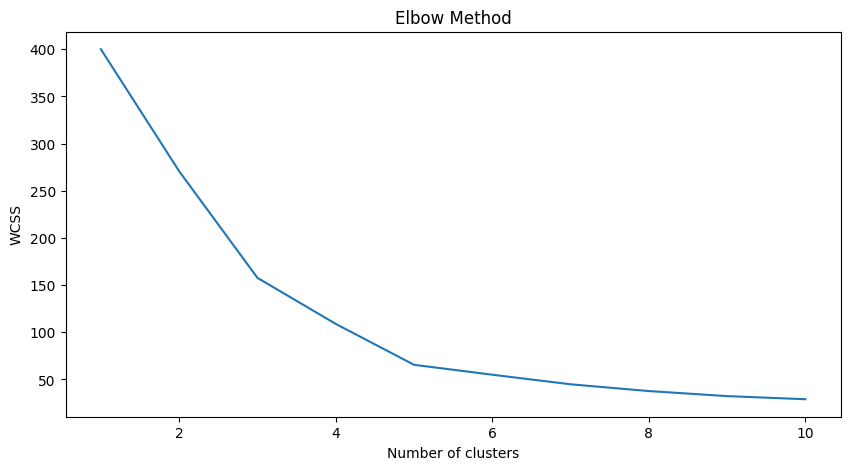

In [ ]:
# Plotting the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choosing k=5 based on the elbow graph (for example)
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster column to the original dataframe
df['Cluster'] = clusters


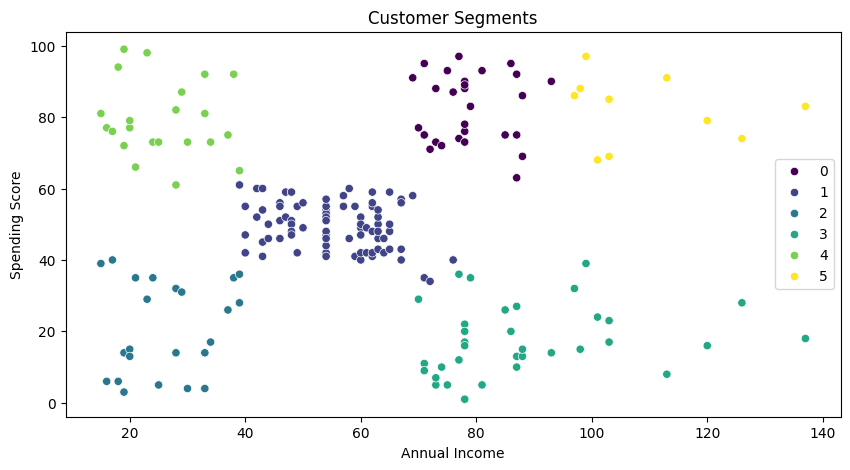

In [ ]:
# Step 6: Visualize the results
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

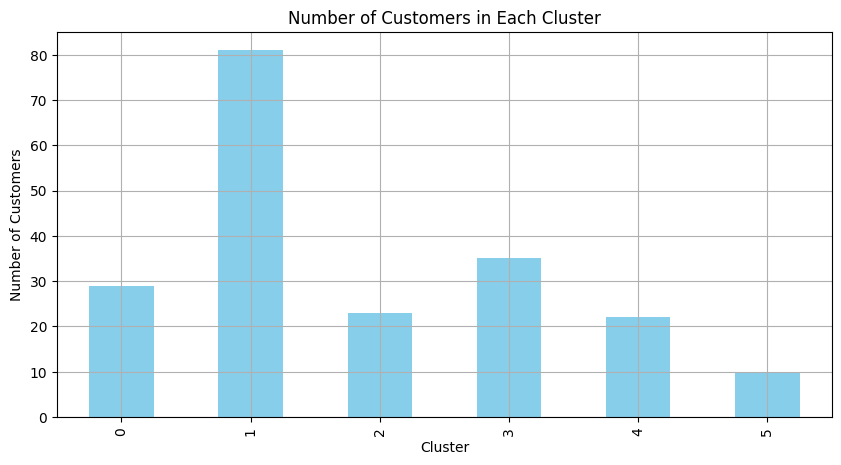

In [ ]:
plt.figure(figsize=(10, 5))
df['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

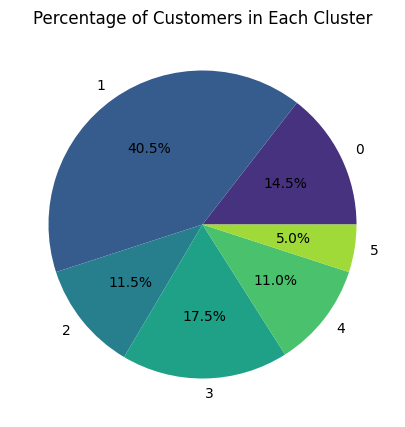

In [ ]:
# Pie chart of the number of customers in each cluster
plt.figure(figsize=(10, 5))
df['Cluster'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('viridis', df['Cluster'].nunique()))
plt.title('Percentage of Customers in Each Cluster')
plt.ylabel('')
plt.show()